<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/preprocess/src/Testeo_Presi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes - Presión

In [103]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_FIGURE = '/histograms/'

# NOMBRE_ESTACION = 'chucuri'
# RANGE_PRESION = [850, 900]
NOMBRE_ESTACION = 'palanquero'
RANGE_PRESION = [950, 1000]
#NOMBRE_ESTACION = 'vizcaina'
#RANGE_PRESION = [950, 1015]


PATH_FINAL_DADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/'
PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_PROCESADOS = NOMBRE_ESTACION.lower() + '_procesado.csv'
FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_pres.csv'


In [105]:
df = pd.read_csv(PATH_FINAL_DADOS + FILE_DATOS_PROCESADOS, 
                 sep = ';', 
                 parse_dates = ["FECHA"],
                 date_parser = lambda col: pd.to_datetime(col)
                )

dfVar = df[['FECHA', 'PRESION']].copy()
dfVar = dfVar.sort_values(by=['FECHA']).reset_index(drop = True)
dfVar

,FECHA,PRESION
0,2011-01-01 01:00:00-05:00,988.8
1,2011-01-01 02:00:00-05:00,988.4
2,2011-01-01 03:00:00-05:00,988.2
3,2011-01-01 04:00:00-05:00,988.7
4,2011-01-01 05:00:00-05:00,989.4
...,...,...
48875,2017-12-31 19:00:00-05:00,989.1
48876,2017-12-31 20:00:00-05:00,990.1
48877,2017-12-31 21:00:00-05:00,991.4
48878,2017-12-31 22:00:00-05:00,991.9


## Test de rango fijo

In [106]:
pres_max = float(RANGE_PRESION[1])
pres_min = float(RANGE_PRESION[0])
lamb_func = lambda r: np.nan if ((r > pres_max) | (r < pres_min)) else r

dfVar['PRESION_RANGO_FIJO'] = dfVar['PRESION'].apply(lamb_func)
dfVar

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,988.8,988.8
1,2011-01-01 02:00:00-05:00,988.4,988.4
2,2011-01-01 03:00:00-05:00,988.2,988.2
3,2011-01-01 04:00:00-05:00,988.7,988.7
4,2011-01-01 05:00:00-05:00,989.4,989.4
...,...,...,...
48875,2017-12-31 19:00:00-05:00,989.1,989.1
48876,2017-12-31 20:00:00-05:00,990.1,990.1
48877,2017-12-31 21:00:00-05:00,991.4,991.4
48878,2017-12-31 22:00:00-05:00,991.9,991.9


<Axes: xlabel='FECHA', ylabel='PRESION_RANGO_FIJO'>

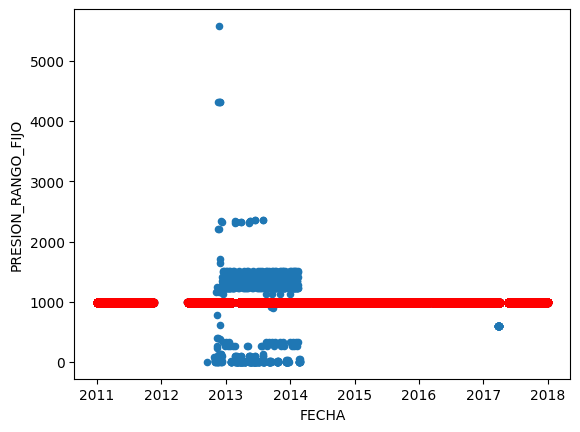

In [107]:
ax = dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION')
dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION_RANGO_FIJO', ax=ax, color='red')

In [108]:
## Para filtrar los valores finales
dfFinal = dfVar[~dfVar['PRESION_RANGO_FIJO'].isnull()]
dfFinal 

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,988.8,988.8
1,2011-01-01 02:00:00-05:00,988.4,988.4
2,2011-01-01 03:00:00-05:00,988.2,988.2
3,2011-01-01 04:00:00-05:00,988.7,988.7
4,2011-01-01 05:00:00-05:00,989.4,989.4
...,...,...,...
48875,2017-12-31 19:00:00-05:00,989.1,989.1
48876,2017-12-31 20:00:00-05:00,990.1,990.1
48877,2017-12-31 21:00:00-05:00,991.4,991.4
48878,2017-12-31 22:00:00-05:00,991.9,991.9


In [109]:
print(dfFinal['PRESION'].max())
#print(dfFinal['PRESION_MAX_DIARIA'].max())
print(dfFinal['PRESION'].mean())

997.3
988.9942888653419


In [110]:
print(dfFinal['PRESION'].min())
#print(dfFinal['TEMP_MIN_DIARIA'].min())

978.5


In [111]:
print(f'Datos iniciales : {dfVar.shape[0]}')
print(f'Datos nulos : {dfVar[dfVar["PRESION"].isnull()].shape[0]}')
dfPresion_null= dfVar[dfVar["PRESION"].isnull()]
print(f'Datos nulos después de los testes : {dfFinal[dfFinal["PRESION_RANGO_FIJO"].isnull()].shape[0]}')
print(f'Datos finales después de testes : {dfFinal.shape[0]}')
print(f'Datos no nulos que fueron eliminados en los testes : {dfVar.shape[0] - dfFinal.shape[0] - dfVar[dfVar["PRESION"].isnull()].shape[0]}')

Datos iniciales : 48880
Datos nulos : 1959
Datos nulos después de los testes : 0
Datos finales después de testes : 46243
Datos no nulos que fueron eliminados en los testes : 678


In [112]:
dfFinal[['FECHA', 'PRESION']].to_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS, header=True, index=False, sep = ';')

In [113]:
dfPresion_null['FECHA'] = pd.to_datetime(dfPresion_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')

<ipython-input-113-ec29ab24148b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['FECHA'] = pd.to_datetime(dfPresion_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')


In [114]:
dfPresion_null['HORA_FECHA'] = dfPresion_null['FECHA'].dt.hour
dfPresion_null['MES_FECHA'] = dfPresion_null['FECHA'].dt.month
dfPresion_null['ANO_FECHA'] = dfPresion_null['FECHA'].dt.year
dfPresion_null

<ipython-input-114-720e0d95720e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['HORA_FECHA'] = dfPresion_null['FECHA'].dt.hour
<ipython-input-114-720e0d95720e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['MES_FECHA'] = dfPresion_null['FECHA'].dt.month
<ipython-input-114-720e0d95720e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,FECHA,PRESION,PRESION_RANGO_FIJO,HORA_FECHA,MES_FECHA,ANO_FECHA
3611,2011-05-31 12:00:00-05:00,NaN,NaN,12,5,2011
3612,2011-05-31 13:00:00-05:00,NaN,NaN,13,5,2011
3613,2011-05-31 14:00:00-05:00,NaN,NaN,14,5,2011
3614,2011-05-31 15:00:00-05:00,NaN,NaN,15,5,2011
3615,2011-05-31 16:00:00-05:00,NaN,NaN,16,5,2011
...,...,...,...,...,...,...
43853,2017-04-02 13:00:00-05:00,NaN,NaN,13,4,2017
43854,2017-04-02 14:00:00-05:00,NaN,NaN,14,4,2017
43855,2017-04-02 15:00:00-05:00,NaN,NaN,15,4,2017
43856,2017-04-02 16:00:00-05:00,NaN,NaN,16,4,2017


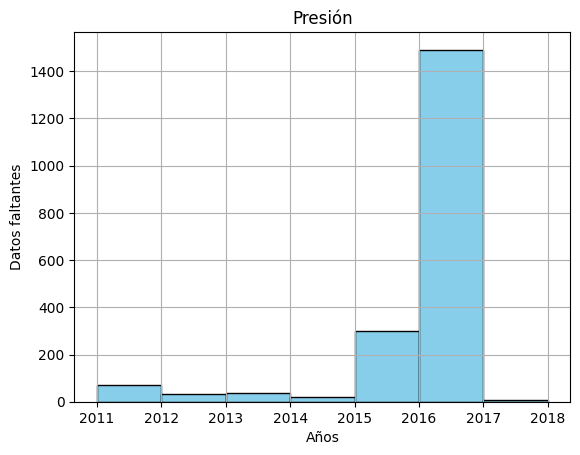

In [115]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['ANO_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(2011, 2019))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim()
ax.grid(True)
ax.set_xlabel("Años")
ax.set_xticks(range(2011, 2019))
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_año_datos_faltantes_pres_{NOMBRE_ESTACION}.png', format='png')

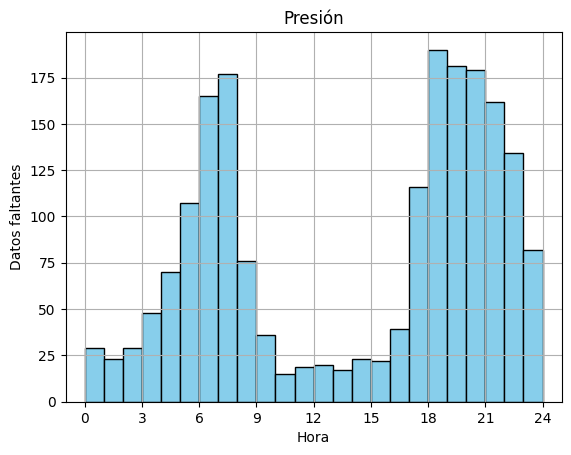

In [116]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['HORA_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_hora_datos_faltantes_Pres_{NOMBRE_ESTACION}.png', format='png')

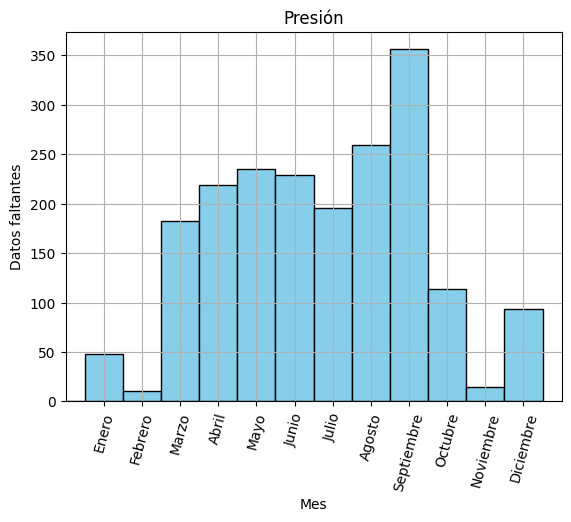

In [117]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['MES_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_mes_datos_faltantes_Pres_{NOMBRE_ESTACION}.png', format='png')

In [118]:
dfFinal

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,988.8,988.8
1,2011-01-01 02:00:00-05:00,988.4,988.4
2,2011-01-01 03:00:00-05:00,988.2,988.2
3,2011-01-01 04:00:00-05:00,988.7,988.7
4,2011-01-01 05:00:00-05:00,989.4,989.4
...,...,...,...
48875,2017-12-31 19:00:00-05:00,989.1,989.1
48876,2017-12-31 20:00:00-05:00,990.1,990.1
48877,2017-12-31 21:00:00-05:00,991.4,991.4
48878,2017-12-31 22:00:00-05:00,991.9,991.9


In [119]:
dfVar

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,988.8,988.8
1,2011-01-01 02:00:00-05:00,988.4,988.4
2,2011-01-01 03:00:00-05:00,988.2,988.2
3,2011-01-01 04:00:00-05:00,988.7,988.7
4,2011-01-01 05:00:00-05:00,989.4,989.4
...,...,...,...
48875,2017-12-31 19:00:00-05:00,989.1,989.1
48876,2017-12-31 20:00:00-05:00,990.1,990.1
48877,2017-12-31 21:00:00-05:00,991.4,991.4
48878,2017-12-31 22:00:00-05:00,991.9,991.9


## Análisis de datos faltantes

In [120]:
from calendar import isleap

In [121]:
dfEliminados = dfVar[dfVar["PRESION_RANGO_FIJO"].isnull()].reset_index(drop=True)[['FECHA', 'PRESION']].copy()
dfEliminados['HORA_FECHA'] = dfEliminados['FECHA'].dt.hour
dfEliminados['MES_FECHA'] = dfEliminados['FECHA'].dt.month
dfEliminados['ANO_FECHA'] = dfEliminados['FECHA'].dt.year
dfEliminados['DIAS_EN_MES'] = dfEliminados['FECHA'].dt.days_in_month
dfEliminados['DIAS_EN_ANO'] = dfEliminados["ANO_FECHA"].apply(lambda x:365 + isleap(x))

In [122]:
dfEliminados

,FECHA,PRESION,HORA_FECHA,MES_FECHA,ANO_FECHA,DIAS_EN_MES,DIAS_EN_ANO
0,2011-05-31 12:00:00-05:00,NaN,12,5,2011,31,365
1,2011-05-31 13:00:00-05:00,NaN,13,5,2011,31,365
2,2011-05-31 14:00:00-05:00,NaN,14,5,2011,31,365
3,2011-05-31 15:00:00-05:00,NaN,15,5,2011,31,365
4,2011-05-31 16:00:00-05:00,NaN,16,5,2011,31,365
...,...,...,...,...,...,...,...
2632,2017-04-02 13:00:00-05:00,NaN,13,4,2017,30,365
2633,2017-04-02 14:00:00-05:00,NaN,14,4,2017,30,365
2634,2017-04-02 15:00:00-05:00,NaN,15,4,2017,30,365
2635,2017-04-02 16:00:00-05:00,NaN,16,4,2017,30,365


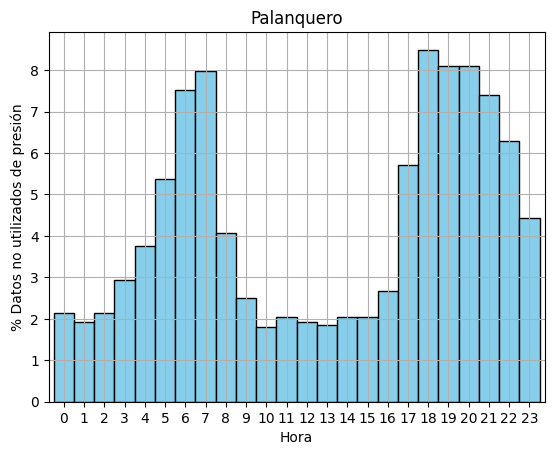

In [123]:
dfEliminados_HORA = (dfEliminados.groupby('HORA_FECHA')
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0])
      )

dfEliminados_HORA["TOTAL_FALTANTES"] = dfEliminados_HORA[("HORA_FECHA", "count")]
dfEliminados_HORA["HORA"] = dfEliminados_HORA[("HORA_FECHA", "")]
dfEliminados_HORA["TOTAL_HORA"] = 7*365
dfEliminados_HORA["PORC_HORA_FALTANTE"] = dfEliminados_HORA["TOTAL_FALTANTES"] / dfEliminados_HORA["TOTAL_HORA"] * 100

fig, ax = plt.subplots()

dfEliminados_HORA.plot.bar(x='HORA', y='PORC_HORA_FALTANTE', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_hora_{NOMBRE_ESTACION}.png', format='png')

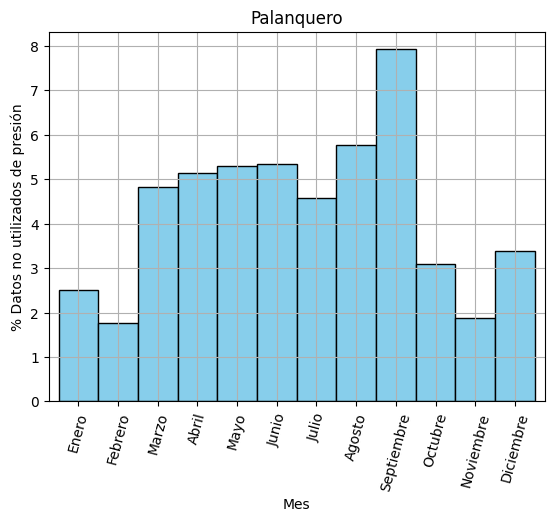

In [124]:
dfEliminados_MES = (dfEliminados
       .groupby(['MES_FECHA', 'ANO_FECHA', 'DIAS_EN_MES'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1, 2])
      )

dfEliminados_MES["TOTAL_FALTANTES"] = dfEliminados_MES[("HORA_FECHA", "count")]
dfEliminados_MES = dfEliminados_MES.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] = dfEliminados_MES['DIAS_EN_MES']*24*7
dfEliminados_MES["PORC_DATOS_POR_MES_ANO_FALTANTE"] = dfEliminados_MES["TOTAL_FALTANTES"] / dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] * 100
dfEliminados_MES.columns=dfEliminados_MES.columns.droplevel(1)
dfEliminados_MES.reset_index(inplace=True)
dfEliminados_MES = (dfEliminados_MES
       .groupby('MES_FECHA')
       .agg({'PORC_DATOS_POR_MES_ANO_FALTANTE': ['sum']})
       .reset_index(level = [0])
      )
dfEliminados_MES["PORC_MES_FALTANTES"] = dfEliminados_MES[("PORC_DATOS_POR_MES_ANO_FALTANTE", "sum")]

fig, ax = plt.subplots()

dfEliminados_MES.plot.bar(x='MES_FECHA', y='PORC_MES_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_mes_{NOMBRE_ESTACION}.png', format='png')

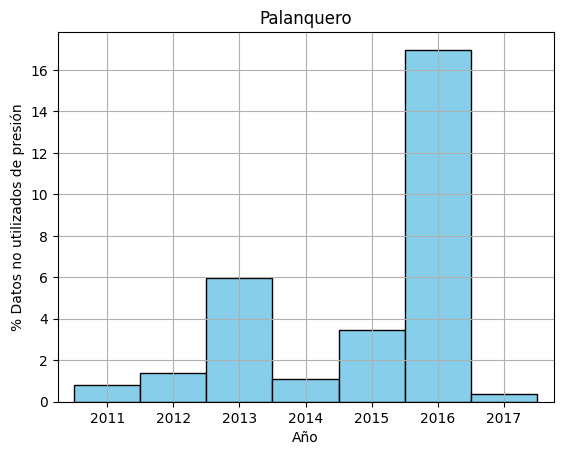

In [125]:
dfEliminados_ANO = (dfEliminados
       .groupby(['ANO_FECHA', 'DIAS_EN_ANO'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1])
      )

dfEliminados_ANO["TOTAL_FALTANTES"] = dfEliminados_ANO[("HORA_FECHA", "count")]
dfEliminados_ANO = dfEliminados_ANO.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] = dfEliminados_ANO['DIAS_EN_ANO']*24
dfEliminados_ANO["PORC_ANO_FALTANTES"] = dfEliminados_ANO["TOTAL_FALTANTES"] / dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] * 100
dfEliminados_ANO
fig, ax = plt.subplots()

dfEliminados_ANO.plot.bar(x='ANO_FECHA', y='PORC_ANO_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Año")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_ano_{NOMBRE_ESTACION}.png', format='png')